In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from sklearn.linear_model import LinearRegression  # For linear regression model
from sklearn.utils import resample  # For resampling
from sklearn.metrics import mean_squared_error  # For calculating mean squared error
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler  # For one-hot encoding and scaling
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For statistical data visualization
import pickle # For saving the model



In [2]:
# Load the data from a CSV file into a pandas DataFrame
df = pd.read_csv('data_concrete.csv')

# Convert the "Number of Days" column to string type
df["Number of Days"] = df["Number of Days"].astype(str)

# Display the information of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Grade                      96 non-null     object 
 1   Glass Fibre (%)            96 non-null     float64
 2   Number of Days             96 non-null     object 
 3   Comp_Strength (N/mm2)      96 non-null     float64
 4   Flex_strenght(N/mm2)       96 non-null     float64
 5   Splitting Strength(N/mm2)  96 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.6+ KB


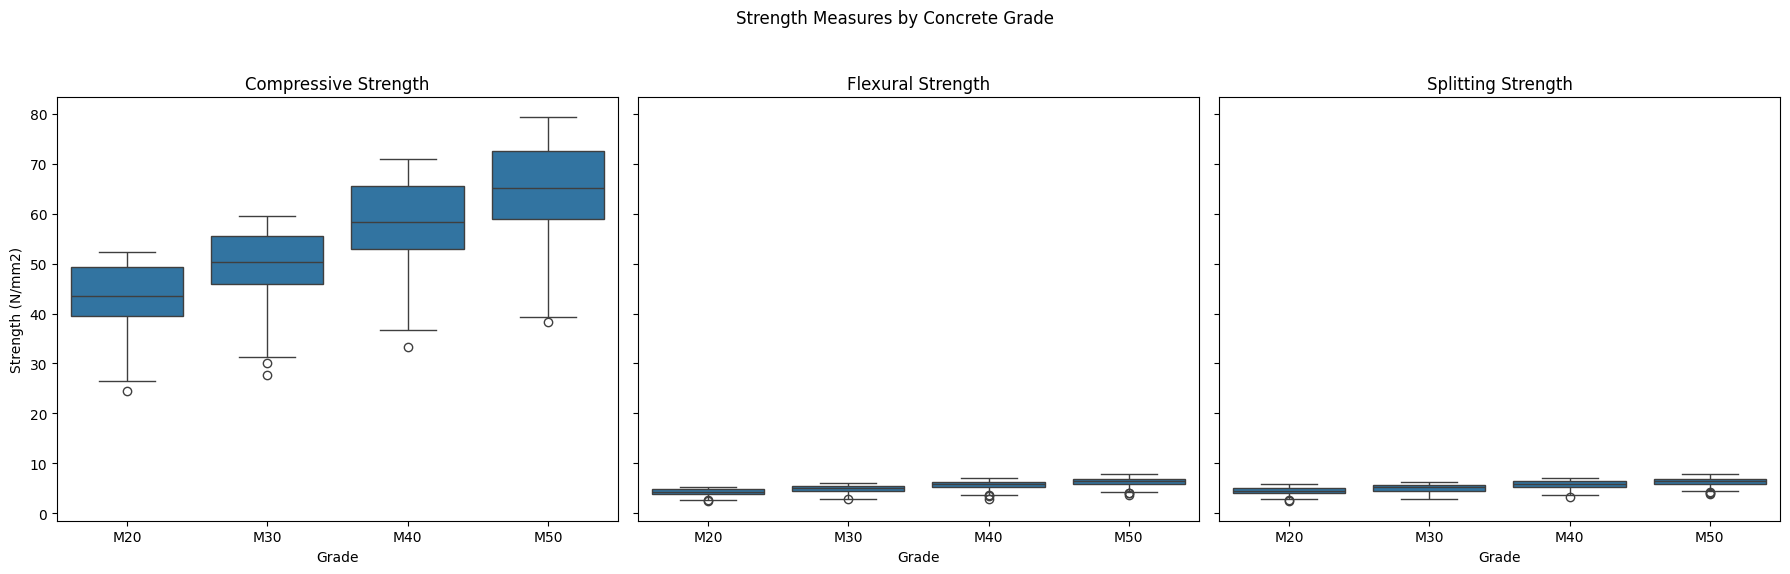

In [3]:
# Create a 1x3 subplot with shared y-axis and a size of 18x6
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Set the overall title for the subplots
plt.suptitle('Strength Measures by Concrete Grade')

# Define the strength measures and their corresponding titles
strengths = ['Comp_Strength (N/mm2)', 'Flex_strenght(N/mm2)', 'Splitting Strength(N/mm2)']
titles = ['Compressive Strength', 'Flexural Strength', 'Splitting Strength']

# For each subplot, create a boxplot of the strength measure by concrete grade
for ax, strength, title in zip(axs, strengths, titles):
    sns.boxplot(x='Grade', y=strength, data=df, ax=ax)  # Create a boxplot
    ax.set_title(title)  # Set the title of the subplot
    ax.set_xlabel('Grade')  # Set the x-axis label
    ax.set_ylabel('Strength (N/mm2)')  # Set the y-axis label

# Adjust the layout of the subplots and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

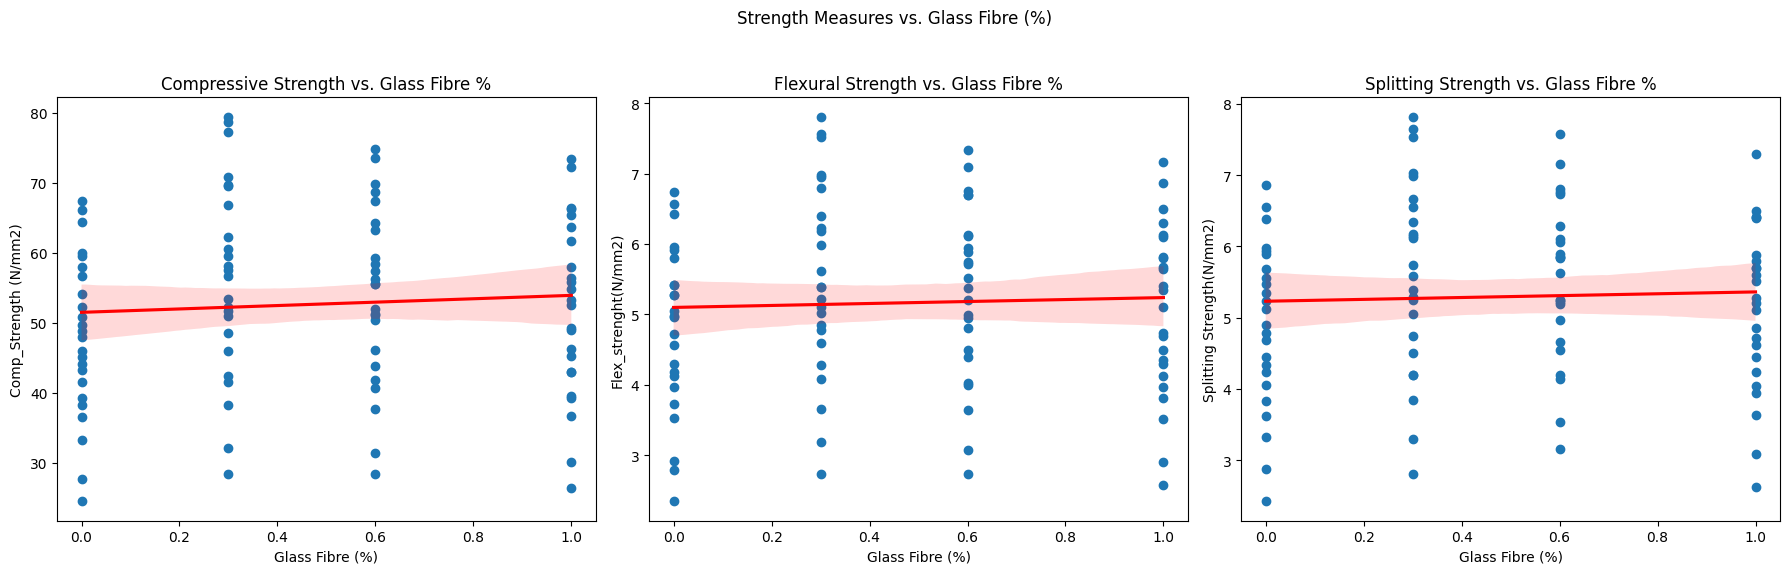

In [4]:
# Create a 1x3 subplot with a size of 18x6
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Set the overall title for the subplots
plt.suptitle('Strength Measures vs. Glass Fibre (%)')

# For each subplot, create a scatter plot of the strength measure vs. glass fibre percentage
for ax, strength, title in zip(axs, strengths, titles):
    # Create a scatter plot
    ax.scatter(df['Glass Fibre (%)'], df[strength])
    # Set the title of the subplot
    ax.set_title(f'{title} vs. Glass Fibre %')
    # Set the x-axis label
    ax.set_xlabel('Glass Fibre (%)')
    # Set the y-axis label
    ax.set_ylabel('Strength (N/mm2)')
    # Fit and plot a linear regression line for each strength measure
    sns.regplot(x='Glass Fibre (%)', y=strength, data=df, ax=ax, scatter=False, color='red')

# Adjust the layout of the subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Display the plot
plt.show()


<Axes: >

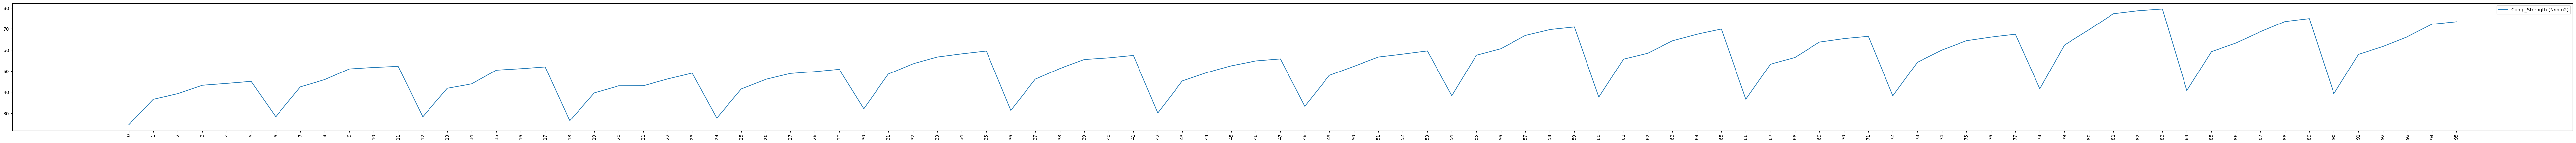

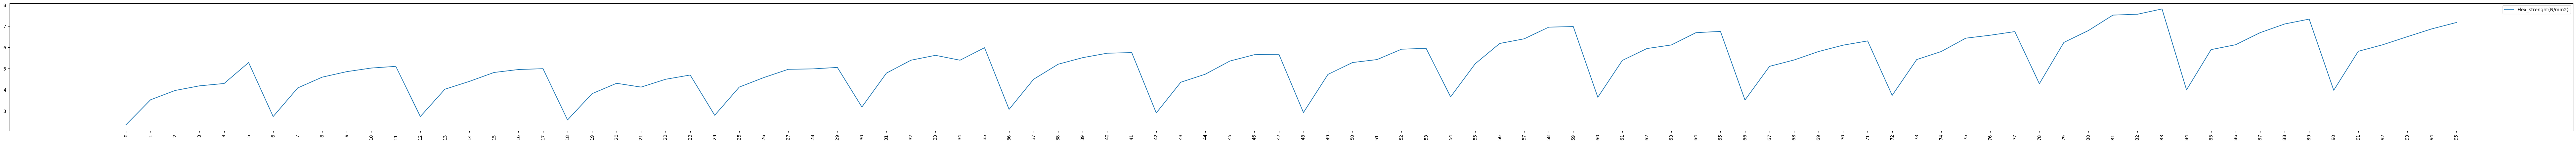

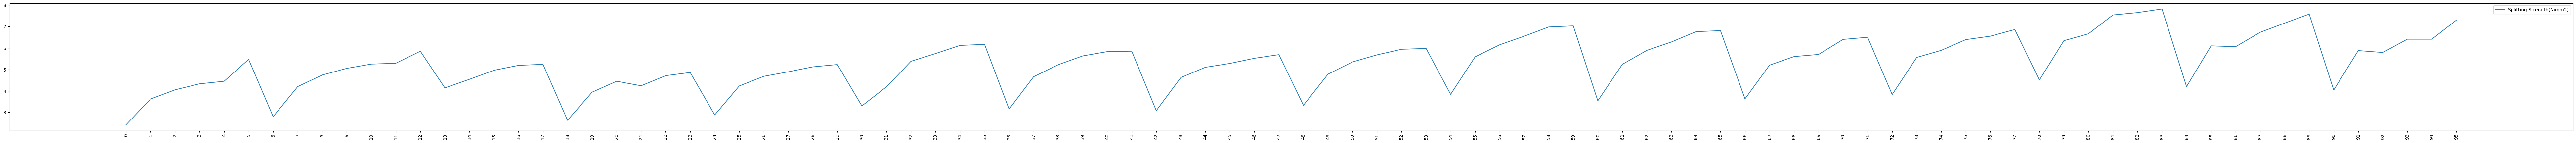

In [5]:
# Plotting the Compressive Strength as a line plot
# xticks are set to the range of the length of the dataframe
# The x-axis labels are rotated 90 degrees for better visibility
# The figure size is set to (100,5) for better visibility
df[['Comp_Strength (N/mm2)']].plot(kind='line', xticks=range(len(df)), rot=90, figsize=(100,5))

# Plotting the Flexural Strength as a line plot
# xticks are set to the range of the length of the dataframe
# The x-axis labels are rotated 90 degrees for better visibility
# The figure size is set to (100,5) for better visibility
df[['Flex_strenght(N/mm2)']].plot(kind='line', xticks=range(len(df)), rot=90, figsize=(100,5))

# Plotting the Splitting Strength as a line plot
# xticks are set to the range of the length of the dataframe
# The x-axis labels are rotated 90 degrees for better visibility
# The figure size is set to (100,5) for better visibility
df[['Splitting Strength(N/mm2)']].plot(kind='line', xticks=range(len(df)), rot=90, figsize=(100,5))


In [6]:
# Create a deep copy of the original dataframe to avoid modifying the original data
df_model = df.copy(deep=True)

# One-hot encoding "Grade" and "Number of Days"
# This is to convert categorical variable into a form that could be provided to ML algorithms to improve prediction
encoder = OneHotEncoder()
encode = encoder.fit(df_model[['Grade', 'Number of Days']])  # Fit the encoder on the columns
encoded_features = encode.transform(df_model[['Grade', 'Number of Days']]).toarray()  # Transform the columns into encoded features

# Normalizing "Glass Fibre (%)"
# This is to scale the values of the column between 0 and 1
scaler = MinMaxScaler()
gf_scaled = scaler.fit_transform(df_model[['Glass Fibre (%)']])  # Fit the scaler on the column and transform it

# Preparing the features (X) and target (y)
# Concatenate the encoded features and the scaled column to form the features
X = np.concatenate([encoded_features, gf_scaled], axis=1)
# The targets are the strength measures
y_comp = df_model['Comp_Strength (N/mm2)'].values
y_flex = df_model['Flex_strenght(N/mm2)'].values
y_split = df_model['Splitting Strength(N/mm2)'].values

In [7]:
# Initialize Linear Regression models for each strength measure
model_comp = LinearRegression()  # Model for Compressive Strength
model_flex = LinearRegression()  # Model for Flexural Strength
model_split = LinearRegression()  # Model for Splitting Strength

# Fit the models on the features (X) and the corresponding targets (y)
model_comp.fit(X, y_comp)  # Fit the model for Compressive Strength
model_flex.fit(X, y_flex)  # Fit the model for Flexural Strength
model_split.fit(X, y_split)  # Fit the model for Splitting Strength


LinearRegression()

In [8]:
# Predict the Compressive Strength using the trained model
y_pred_comp =  model_comp.predict(X)

# Predict the Flexural Strength using the trained model
y_pred_flex =  model_flex.predict(X)

# Predict the Splitting Strength using the trained model
y_pred_split =  model_split.predict(X)

In [9]:
# Calculate the Mean Squared Error (MSE) for the Compressive Strength predictions
mse_comp = mean_squared_error(y_pred_comp, y_comp)

# Calculate the Mean Squared Error (MSE) for the Flexural Strength predictions
mse_flex = mean_squared_error(y_pred_flex, y_flex)

# Calculate the Mean Squared Error (MSE) for the Splitting Strength predictions
mse_split = mean_squared_error(y_pred_split, y_split)

In [10]:
print(f'Mean Squared Error (Compressive Strength): {mse_comp:.2f}')
print(f'Mean Squared Error (Flexural Strength): {mse_flex:.2f}')
print(f'Mean Squared Error (Splitting Strength): {mse_split:.2f}')

Mean Squared Error (Compressive Strength): 12.25
Mean Squared Error (Flexural Strength): 0.11
Mean Squared Error (Splitting Strength): 0.23


In [15]:
def predict_strengths(grade, days, percentage_mix):
    # Encode the grade and days using the previously defined encoder
    encoded_grade_days = encode.transform([[grade, days]]).toarray()

    # Normalize the percentage mix
    normalized_percentage_mix = scaler.transform([[percentage_mix]])

    # Prepare the input features
    input_features = np.concatenate([encoded_grade_days, normalized_percentage_mix], axis=1)

    # Predict the strengths using the trained models
    predicted_comp_strength = model_comp.predict(input_features)
    predicted_flex_strength = model_flex.predict(input_features)
    predicted_split_strength = model_split.predict(input_features)

    # Return the predicted strengths
    return print(f'Predicted Compressive Strength: {predicted_comp_strength[0]:.2f} N/mm2\nPredicted Flexural Strength: {predicted_flex_strength[0]:.2f} N/mm2\nPredicted Splitting Strength: {predicted_split_strength[0]:.2f} N/mm2')
    # return predicted_comp_strength, predicted_flex_strength, predicted_split_strength


In [16]:
predict_strengths("M50", "28", 0.1) # Predict the strengths for a combination of grade, number of days, and percentage mix

Predicted Compressive Strength: 58.72 N/mm2
Predicted Flexural Strength: 5.78 N/mm2
Predicted Splitting Strength: 5.77 N/mm2


c:\study_setup\Anaconda\envs\scrape_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\study_setup\Anaconda\envs\scrape_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [13]:

# Save the models
# Open the file 'model_comp.pkl' in write-binary mode
with open('model_comp.pkl', 'wb') as f:
    # Use pickle's dump function to write the model_comp object to the file
    pickle.dump(model_comp, f)

# Open the file 'model_flex.pkl' in write-binary mode
with open('model_flex.pkl', 'wb') as f:
    # Use pickle's dump function to write the model_flex object to the file
    pickle.dump(model_flex, f)

# Open the file 'model_split.pkl' in write-binary mode
with open('model_split.pkl', 'wb') as f:
    # Use pickle's dump function to write the model_split object to the file
    pickle.dump(model_split, f)
